In [76]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot
# Automatically update if external package code is modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
''' Plot knobs. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.25
fig_dims = (5, 2)
fig_label_fontsize = 9
ft = fm.FontProperties('Times New Roman')
ft.set_size(fig_label_fontsize)

''' [TODO] Figure properties. Specify the csv file and corresponding columns. '''
csv_path = './sec2/motivation_breakdown.csv'
workload_list = ['Class 0', 'Class 1', 'Class 2']
scheme_list = ['MakeKV', 'UpdateIndex', 'MarkGarbage']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}
scheme_dict['MakeKV'] = 'Make KV Item'
scheme_dict['UpdateIndex'] = 'Update Index'
scheme_dict['MarkGarbage'] = 'Mark Garbage'

fig_title = 'Update Breakdown'
fig_name = 'motivation_breakdown'
fig_ylim = (0, 25000.01)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1], 5000))
fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [2, 1, 0]]
assert len(fig_bar_colors) == len(scheme_dict)

print("Expect {} bars and {} components within each bar".format(len(workload_dict), len(scheme_dict)))

Expect 3 bars and 3 components within each bar


In [78]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
# TODO assert workload_name
# TODO assert scheme_name
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 1
        fig_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(fig_xticks)

pprint(fig_data_2darr)

[[1564.97, 1276.29, 1047.45],
 [3121.84, 3727.23, 2977.51],
 [5885.45, 11276.03, 7047.62]]


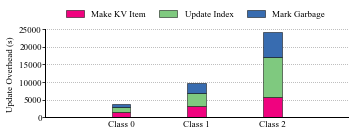

In [79]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
# ax = fig.gca() # Only used with no subplot mode
fig_ax = fig.add_subplot(1, 1, 1) # Knob: plot the first subgraph of a 1x1 grid, i.e., no subplot mode
easypyplot.format.turn_off_box(fig_ax)

fig_h = easypyplot.barchart.draw(
    fig_ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    # xticklabelrotation=25, # Knob: rotated x tick labels
    colors=fig_bar_colors)

''' x axis '''
fig_ax.xaxis.set_tick_params(pad=0) # Knob: distance between x tick label and x-axis
fig_ax.set_xlim([fig_ax.get_xticks()[0] - 1, fig_ax.get_xticks()[-1] + 1])
fig_ax.set_xticks(fig_xticks)
fig_ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
fig_ax.xaxis.set_ticks_position('none') # Knob: uncomment for visible x ticks
# ax.tick_params(direction='in') # Knob: [in, out, inout]
# ax.set_xlabel(fig_title) # Knob: the overall x label text

''' y axis '''
fig_ax.yaxis.set_tick_params(pad=0) # Knob: distance between y tick label and y-axis
# easypyplot.format.set_axis_to_percent(fig_ax.yaxis) # Uncomment for y axis tick label in xx% format
fig_ax.yaxis.grid(True)
fig_ax.set_ylim(fig_ylim)
fig_ax.set_yticks(fig_yticks)
# fig_yticks_label = ["{}".format(item) for item in fig_yticks] # Change for customized y tick label text
# fig_ax.set_yticklabels(fig_yticks_label, fontproperties=ft)
fig_ax.set_ylabel('Update Overhead (s)', multialignment='center', fontproperties=ft)

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(fig_h, legend, loc='upper center', frameon=False, prop=ft,
        bbox_to_anchor=(0.55, 1.1),
        ncol=len(legend),
        columnspacing=1.5, # padding between columns
        labelspacing=0, # padding between rows
        )

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(fig_ax, hratio=0.8)

In [81]:
''' Save figures'''
fig.savefig('sec2/' + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # BUG: it sometimes generates wierd chopped pdf figures
# fig.savefig(fig_name+'.svg', format="svg", bbox_inches = 'tight', transparent=False) # svg format